# Proyecto 3 

Importando ando

In [80]:
import pandas as pd
import numpy as np
import re
import datetime as dt
import matplotlib.pyplot as plt

In [17]:
sharks=pd.read_csv('attacks.csv', encoding = 'latin-1')

Iniciaré explorando un poquito y paso a pasito porque si no me pierdo...

In [18]:
sharks.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# Iniciemos limpieza de datos ->

1- Iniciamos observando el shape del dataframe

In [19]:
sharks.shape

(25723, 24)

2- Ahora nuestras columnas

In [20]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

3- Eliminaré algunas de ellas que no ocuparé

In [21]:
sharks.drop(columns=['Case Number','Investigator or Source','Name','href formula','href','original order', 'Unnamed: 22',
       'Unnamed: 23', 'pdf','Area','Age','Sex ','Location','Case Number.1', 'Case Number.2','Species ','Time','Country'],inplace=True)

In [22]:
sharks.head(5)

,Date,Year,Type,Activity,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,Standing,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,Unprovoked,Surfing,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N


Hemos logrado que se vea algo más limpio y entendible (a mí parecer) aunque aún falta un largo camino.

# Trabajaremos con lo valores nulos para practicar

1-¿Cuántos valores nulos tenemos?

In [23]:
sharks.isnull().sum()

Date           19421
Year           19423
Type           19425
Activity       19965
Injury         19449
Fatal (Y/N)    19960
dtype: int64

In [24]:
sharks.dropna(axis=0, how='any', thresh=3, inplace=True)

2-Acabo de limpiar las filas con los valores nulos y por lo tanto mi shape disminuyó

In [25]:
sharks.shape

(6302, 6)

3-Ahora voy a eliminar valores que estén duplicados

In [14]:
sharks=sharks.drop_duplicates()

In [15]:
sharks.shape

(6279, 6)

# Vamos a trabajar con nuestras columnas

1-Vamos a sustituir los valores nulos de Type

In [26]:
sharks[sharks['Type'].isnull()]

,Date,Year,Type,Activity,Injury,Fatal (Y/N)
85,15-Sep-2017,2017.0,NaN,Fishing,Injuries to hands and legs,N
382,27-Jul-2015,2015.0,NaN,Surfing,Injury to hand,NaN
4867,Reported 11-Sep-1936,1936.0,NaN,Wreck of a sampam,FATAL,Y
5705,Reported 03-Mar-1890,1890.0,NaN,Diving,FATAL,Y


In [27]:
sharks["Type"].fillna("Unprovoked", inplace=True)

Estamos indicando que al no tener valores son ataques no provocados, viendo que la columna aporta ese dato.

In [28]:
sharks.head(5)

,Date,Year,Type,Activity,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,Standing,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,Unprovoked,Surfing,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,Provoked,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N


Ahora vamos a limpiar la columna "fatal"

In [29]:
sharks[sharks["Fatal (Y/N)"].isnull()]

,Date,Year,Type,Activity,Injury,Fatal (Y/N)
27,15-Apr-2018,2018.0,Unprovoked,Swimming,"Multiple severe injuries to arms and leg, leg ...",NaN
76,01-Oct-2017,2017.0,Invalid,Scuba Diving,FATAL,NaN
79,24-Sep-2017,2017.0,Invalid,Surfing,"Lacerations to right ankle, foot & toe",NaN
84,15-Sep-2017,2017.0,Invalid,Scuba Diving,"FATAL, but death was probably due to drowning",NaN
98,26-Aug-2017,2017.0,Invalid,Swimming,Lacerations to left foot,NaN
...,...,...,...,...,...,...
6147,1767,1767.0,Invalid,Bathing,Lacerations to arm & leg,NaN
6157,1733,1733.0,Invalid,NaN,"Partial hominid remains recovered from shark, ...",NaN
6158,1723,1723.0,Unprovoked,NaN,Struck on thigh,NaN
6164,Late 1600s Reported 1728,1642.0,Invalid,Went overboard,FATAL,NaN


In [30]:
sharks["Fatal (Y/N)"].fillna("N")

0       N
1       N
2       N
3       N
4       N
       ..
6297    Y
6298    Y
6299    Y
6300    Y
6301    Y
Name: Fatal (Y/N), Length: 6302, dtype: object

In [31]:
list(set(sharks['Fatal (Y/N)']))

['Y', nan, 'UNKNOWN', 'M', 'N ', '2017', 'N', ' N', 'y']

Podemos ver los valores se encuentran en la columna "fatal" y encontramos algunos conceptos que pueden ser agrupados como la "Y", "y" y las diferentes "N´s"

In [32]:
sharks.loc[sharks["Fatal (Y/N)"] == "y", "Fatal (Y/N)"] = "Y"

In [33]:
sharks.loc[sharks["Fatal (Y/N)"] == "N", "Fatal (Y/N)"] = "N"

In [34]:
sharks.loc[sharks["Fatal (Y/N)"] == "N", "Fatal (Y/N)"] = "N"

In [35]:
sharks.loc[sharks["Fatal (Y/N)"] == "N", "Fatal (Y/N)"] = "N"

In [36]:
sharks[sharks["Fatal (Y/N)"]=="2017"]

,Date,Year,Type,Activity,Injury,Fatal (Y/N)
786,10-Jun-2012,2012.0,Provoked,Attempting to rescue an injured & beached shark,Lower left leg injured PROVOKED ACCIDENT,2017


In [37]:
sharks.loc[sharks["Fatal (Y/N)"] == "2017", "Fatal (Y/N)"] = "N"

Nuestras posibilidades son:

In [38]:
list(set(sharks["Fatal (Y/N)"]))

['Y', nan, 'UNKNOWN', 'M', 'N ', 'N', ' N']

In [39]:
sharks.shape

(6302, 6)

Columna de "fatal" con valores nulos

In [40]:
sharks.dropna(subset=["Fatal (Y/N)"], inplace=True)

Seguiremos limpiando de información no importante:
 ->   haremos algunos cambios y renombraré la columna

In [41]:
sharks.replace({"Fatal (Y/N)": {"Y":1, "N":0}}, inplace=True)

In [42]:
sharks.rename(columns = {"Fatal (Y/N)":"Fatal"}, inplace=True)

Ahora vamos con la columna de "Activity"

In [44]:
sharks.isnull().sum()

Date          0
Year          1
Type          0
Activity    419
Injury       21
Fatal         0
dtype: int64

De nuevo vamos a eliminar los valores nulos:

In [45]:
sharks[sharks["Activity"].isnull()].head()

,Date,Year,Type,Activity,Injury,Fatal
47,28-Jan-2018,2018.0,Unprovoked,NaN,Injuries to right leg,0
108,29-Jul-2017,2017.0,Unprovoked,NaN,Bite to left thigh / minor injury,0
112,23-Jul-2017,2017.0,Unprovoked,NaN,Minor injury to hand,0
114,22-Jul-2017,2017.0,Unprovoked,NaN,Foot bitten,0
154,17-Apr-2017,2017.0,Unprovoked,NaN,Minor bite to the foot,0


In [46]:
sharks.dropna(subset=["Activity"], inplace=True)

In [47]:
sharks.isnull().sum()

Date         0
Year         1
Type         0
Activity     0
Injury      11
Fatal        0
dtype: int64

Seguimos limpiando nuestras columnas:
    Ahora "Injury"

Único valor único con ataque fatal

In [48]:
sharks["Injury"].fillna("death", inplace=True)

In [49]:
sharks.isnull().sum()

Date        0
Year        1
Type        0
Activity    0
Injury      0
Fatal       0
dtype: int64

Limparé la columna "Type"

In [51]:
sharks['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Boat', 'Boatomg'], dtype=object)

In [52]:
sharks["Type"].replace(["Boating"], "Unprovoked", inplace=True)

In [53]:
sharks["Type"].replace(["Boating"], "Unprovoked", inplace=True)

In [54]:
sharks["Type"].replace(["Boat"], "Unprovoked", inplace=True)

In [55]:
sharks["Type"].replace(["Sea Disaster"], "Unprovoked", inplace=True)

In [56]:
sharks['Type'].unique()

array(['Unprovoked', 'Invalid', 'Provoked', 'Questionable', 'Boatomg'],
      dtype=object)

Agruparé algunos valores y eliminare categorías:

Limpieza de "Year"

In [57]:
sharks['Date']

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6296    Before 1906
6297    Before 1903
6298    Before 1903
6299      1900-1905
6301      1845-1853
Name: Date, Length: 5344, dtype: object

In [58]:
sharks["Date"]=sharks["Date"].str.replace("-"," ")

In [59]:
sharks["Date"]=sharks["Date"].str.replace("-"," ")

In [60]:
sharks["Date"]=sharks["Date"].str.split(" ")

In [62]:
sharks["Year"]=sharks["Date"].str[-1]

In [63]:
sharks["Year"].tail()

6296    1906
6297    1903
6298    1903
6299    1905
6301    1853
Name: Year, dtype: object

Limpieza de año:

In [64]:
sharks["Year"].str.split("s")

0       [2018]
1       [2018]
2       [2018]
3       [2018]
4       [2018]
         ...  
6296    [1906]
6297    [1903]
6298    [1903]
6299    [1905]
6301    [1853]
Name: Year, Length: 5344, dtype: object

In [65]:
sharks["Year"]=sharks["Year"].str[0:4]

In [66]:
sharks['Year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6296    1906
6297    1903
6298    1903
6299    1905
6301    1853
Name: Year, Length: 5344, dtype: object

Crearé una columna llamada "Mes"

In [67]:
sharks["Date"]

0       [25, Jun, 2018]
1       [18, Jun, 2018]
2       [09, Jun, 2018]
3       [08, Jun, 2018]
4       [04, Jun, 2018]
             ...       
6296     [Before, 1906]
6297     [Before, 1903]
6298     [Before, 1903]
6299       [1900, 1905]
6301       [1845, 1853]
Name: Date, Length: 5344, dtype: object

In [68]:
sharks["Month"]=sharks["Date"].str[-2]

In [69]:
sharks["Month"]

0          Jun
1          Jun
2          Jun
3          Jun
4          Jun
         ...  
6296    Before
6297    Before
6298    Before
6299      1900
6301      1845
Name: Month, Length: 5344, dtype: object

In [70]:
sharks["Month"].fillna("Unknown", inplace=True)

In [71]:
sharks["Month"].replace(["23", " ","Before","1941","1900","1883","1845"], "Unknown", inplace=True)

In [72]:
sharks["Month"]

0           Jun
1           Jun
2           Jun
3           Jun
4           Jun
         ...   
6296    Unknown
6297    Unknown
6298    Unknown
6299    Unknown
6301    Unknown
Name: Month, Length: 5344, dtype: object

In [73]:
sharks.tail(5)

,Date,Year,Type,Activity,Injury,Fatal,Month
6296,"[Before, 1906]",1906,Unprovoked,Swimming,FATAL,1,Unknown
6297,"[Before, 1903]",1903,Unprovoked,Diving,FATAL,1,Unknown
6298,"[Before, 1903]",1903,Unprovoked,Pearl diving,FATAL,1,Unknown
6299,"[1900, 1905]",1905,Unprovoked,Swimming,FATAL,1,Unknown
6301,"[1845, 1853]",1853,Unprovoked,Swimming,"FATAL. ""Shark bit him in half, carrying away t...",1,Unknown


# Así queda la tabla después de limpiarla

In [74]:
sharks_clean=sharks[["Year","Month","Activity","Type","Fatal"]]

In [75]:
sharks_clean

,Year,Month,Activity,Type,Fatal
0,2018,Jun,Paddling,Unprovoked,0
1,2018,Jun,Standing,Unprovoked,0
2,2018,Jun,Surfing,Invalid,0
3,2018,Jun,Surfing,Unprovoked,0
4,2018,Jun,Free diving,Provoked,0
...,...,...,...,...,...
6296,1906,Unknown,Swimming,Unprovoked,1
6297,1903,Unknown,Diving,Unprovoked,1
6298,1903,Unknown,Pearl diving,Unprovoked,1
6299,1905,Unknown,Swimming,Unprovoked,1


Guardaré mi tablita ya limpia :)

In [76]:
sharks_clean.to_csv('attacks_data_clean.csv')

# Sección de preguntas y respuestas:

¿Como fueron los ataques?

<AxesSubplot:>

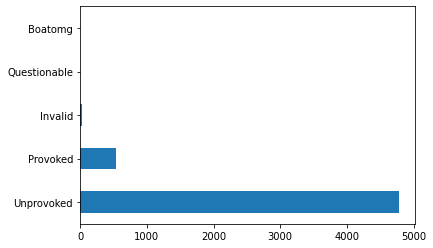

In [81]:
sharks["Type"].value_counts().plot(kind = "barh")

Ataques

<AxesSubplot:>

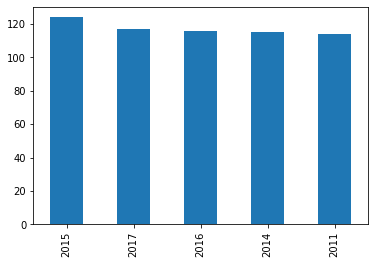

In [82]:
sharks["Year"].value_counts().nlargest(5).plot(kind="bar")